Реализуйте следующие классы (указана сигнатура init):

BaseTransform(p: float) [базовый класс для всех трансформаций]
RandomCrop(p: float, **kwargs)
RandomRotate(p: float, **kwargs)
RandomZoom(p: float, **kwargs) {*}
ToTensor()
Compose(list[BaseTransform])
Последний класс должен принимать на вход список инстансов трех других. При вызове метода call он должен последовательно вызывать трансформации из списка. При вызове каждого из них с вероятностью p должно применяться изменение изображения, с вероятностью 1-p должно возвращаться исходное изображение. Класс входного изображения у всех классов - PIL.Image, выходного тоже. Класс ToTensor должен принимать на вход PIL.Image, возвращать - torch.Tensor.

In [1]:
import random
import PIL
import PIL.Image
import numpy as np
import torch
import torchvision

from transformation import RandomCrop, RandomRotate, RandomZoom, To_tensor, Compose


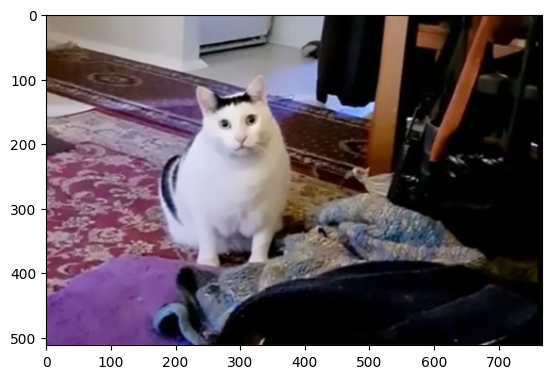

In [2]:
import matplotlib.pyplot as plt

IMAGE_PATH = "../../data/images"
img = PIL.Image.open(f"{IMAGE_PATH}/kot_mjaukaet.jpg")
plt.imshow(img)

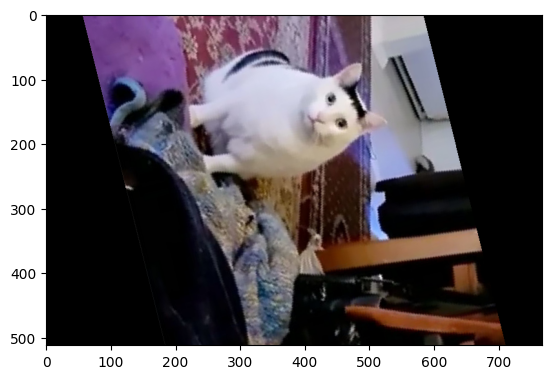

In [3]:
t1 = RandomRotate(0.9)
img2 = t1(img)
plt.imshow(img2)

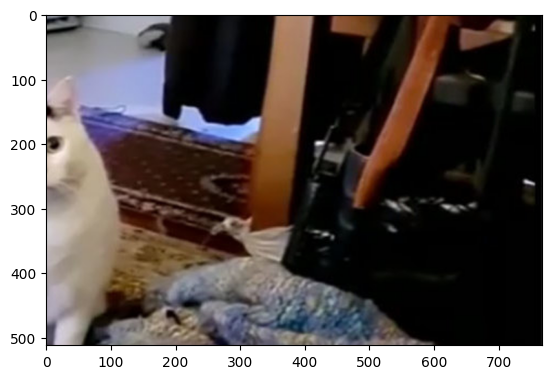

In [4]:
t2 = RandomZoom(0.9)
img3 = t2(img)
plt.imshow(img3)

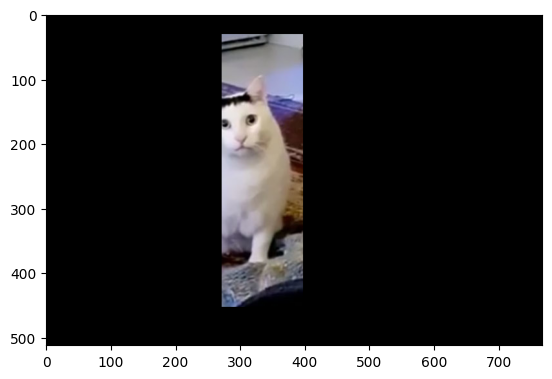

In [5]:
t3 = RandomCrop(0.9)
img4 = t3(img)
plt.imshow(img4)

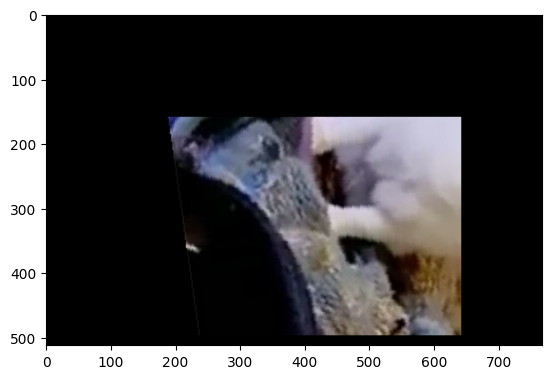

In [6]:
com = Compose([t1,t2,t3])
img5 = com(img)
plt.imshow(img5)

In [9]:
tens = To_tensor()
img_out = tens(img3)
print(img_out)

tensor([[[141, 141, 141,  ...,   0,  13,  21],
         [141, 140, 139,  ...,   0,  13,  21],
         [142, 139, 136,  ...,   0,  13,  21],
         ...,
         [ 75,  76,  77,  ...,   1,  12,  20],
         [ 68,  69,  70,  ...,   1,  12,  20],
         [ 63,  64,  66,  ...,   1,  12,  20]],

        [[144, 144, 145,  ...,   0,  13,  21],
         [144, 143, 143,  ...,   0,  13,  21],
         [144, 143, 140,  ...,   0,  13,  21],
         ...,
         [ 69,  70,  72,  ...,   1,  12,  20],
         [ 62,  62,  63,  ...,   1,  12,  20],
         [ 57,  57,  58,  ...,   1,  12,  20]],

        [[159, 158, 156,  ...,   0,  13,  21],
         [160, 157, 154,  ...,   0,  13,  21],
         [160, 156, 151,  ...,   0,  13,  21],
         ...,
         [ 80,  83,  86,  ...,   1,  12,  20],
         [ 73,  75,  78,  ...,   1,  12,  20],
         [ 69,  70,  73,  ...,   1,  12,  20]]], dtype=torch.uint8)
